<a href="https://colab.research.google.com/github/ainesko/NGS-HW/blob/main/NGS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##***Результаты анализа ридов Illumina***

In [ ]:
data = {'Общее число ридов':[3432364,
                             4315600],
        
        'Выравнившиеся':['3156674 (91.97%)',
                              '4103027 (95.07%)'],
        
        'Среднее покрытие':[130.82,
                             138.587],
        
        'Доля покрытой области генома':['100%',
                              '88.7%'],
        
        'Среднее расстояние вставки':[266.21,
                             274.77],
        
        'Среднеквадратичное отклонение':[61.04,
                             86.45],
        
        'Интервал минимальной ширины, в который попадает 95% ридов':['[173.0, 410.0]',
                              '[157.0, 478.0]'],
        
        'Процент ошибок':[3.26,
                             1.55]}

df = pd.DataFrame(data, index =['frag_alignment.sam',
                                'jump_alignment.bam'])
df

,Общее число ридов,Выравнившиеся,Среднее покрытие,Доля покрытой области генома,Среднее расстояние вставки,Среднеквадратичное отклонение,"Интервал минимальной ширины, в который попадает 95% ридов",Процент ошибок
frag_alignment.sam,3432364,3156674 (91.97%),130.820,100%,266.21,61.04,"[173.0, 410.0]",3.26
jump_alignment.bam,4315600,4103027 (95.07%),138.587,88.7%,274.77,86.45,"[157.0, 478.0]",1.55


## ***Результаты анализа ридов IonTorrent***

In [ ]:
data = {'Среднее покрытие':[34.037,
                             35.7],
        
        'Доля покрытой области генома':['100%',
                              '100%'],
        
        'Процент ошибок':['1.61%',
                              '0.69%'],
        
        'Средняя длина делеции':[1.09,
                             1.08],
        
        'Средняя длина вставки':[1.064,
                             1.055],
        
        'Среднее качество при ошибочно вставленном нуклеотиде':[16.09,
                             15.39],
        
        'Среднее качество при замене':[19.14,
                             21.04],
        
        'Процент инделов, находящихся рядом с гомополимерными участками':[28.19,
                             26.26]}

df = pd.DataFrame(data, index =['B22-730',
                                'C24-698'])
df

,Среднее покрытие,Доля покрытой области генома,Процент ошибок,Средняя длина делеции,Средняя длина вставки,Среднее качество при ошибочно вставленном нуклеотиде,Среднее качество при замене,"Процент инделов, находящихся рядом с гомополимерными участками"
B22-730,34.037,100%,1.61%,1.09,1.064,16.09,19.14,28.19
C24-698,35.700,100%,0.69%,1.08,1.055,15.39,21.04,26.26


# Часть 1: анализ ридов Illumina
## Скачивание файлов с диска

***B.faecium***

In [7]:
def download_from_disk(id):
  import gdown
  gdown.download(f'https://drive.google.com/uc?id={id}&confirm=t', quiet=False)

In [ ]:
download_from_disk('1gwiztaQnJ0JuoLersNbGD0vuUxT1lgdo')

Downloading...
From: https://drive.google.com/uc?id=1gwiztaQnJ0JuoLersNbGD0vuUxT1lgdo&confirm=t
To: /content/frag.R1.fastq.gz
100%|██████████| 215M/215M [00:02<00:00, 86.5MB/s]


In [ ]:
download_from_disk('1R-GVUzwQTFjeKotZzJALvKiyYmUwUZd7')

Downloading...
From: https://drive.google.com/uc?id=1R-GVUzwQTFjeKotZzJALvKiyYmUwUZd7&confirm=t
To: /content/frag.R2.fastq.gz
100%|██████████| 199M/199M [00:01<00:00, 142MB/s]


In [8]:
download_from_disk('1c5aUoNpqtR97kdi6Pf7_PB4ZYfdpgd7n')

Downloading...
From: https://drive.google.com/uc?id=1c5aUoNpqtR97kdi6Pf7_PB4ZYfdpgd7n&confirm=t
To: /content/jump.R1.fastq.gz
100%|██████████| 197M/197M [00:00<00:00, 209MB/s]


In [9]:
download_from_disk('100MuDiPAX7z2qdcRpQ3DO3EV-H7aPPub')

Downloading...
From: https://drive.google.com/uc?id=100MuDiPAX7z2qdcRpQ3DO3EV-H7aPPub&confirm=t
To: /content/jump.R2.fastq.gz
100%|██████████| 196M/196M [00:00<00:00, 235MB/s]


In [10]:
download_from_disk('1kMaq8gGzrD7BDYFwoVhjSt65d1g8ZVh5')

Downloading...
From: https://drive.google.com/uc?id=1kMaq8gGzrD7BDYFwoVhjSt65d1g8ZVh5&confirm=t
To: /content/ref.fasta.gz
100%|██████████| 1.03M/1.03M [00:00<00:00, 72.3MB/s]


# 0. Разобраться с Bowtie2 / bwa mem
Построить индекс, запустить любой из тулов на ваш выбор, определить процент приложившихся ридов (samtools flagstat). 


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
!pip install -q condacolab

In [7]:
import condacolab

In [8]:
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:43
🔁 Restarting kernel...


In [9]:
!conda install -c bioconda bwa

Solving environment: | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - bwa


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bwa-0.7.17                 |       h5bf99c6_8         608 KB  bioconda
    ca-certificates-2022.5.18.1|       ha878542_0         144 KB  conda-forge
    certifi-2022.5.18.1        |   py37h89c1867_0         150 KB  conda-forge
    conda-4.13.0               |   py37h89c1867_0         990 KB  conda-forge
    perl-5.32.1                | 0_h7f98852_perl5        14.5 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        16.3 MB

The following NEW packages will be INSTALLED:

  bwa                bioconda/linux-64::bwa-0.7.17-h5bf99c6_8
  perl               conda-forge/linux-64::perl-5.32.1-0_h7f98852_perl5



In [10]:
!conda install -c bioconda samtools

Solving environment: - \ | / - \ | / - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - samtools


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    samtools-1.3.1             |                0         1.5 MB  bioconda
    ------------------------------------------------------------
                                           Total:         1.5 MB

The following NEW packages will be INSTALLED:

  samtools           bioconda/linux-64::samtools-1.3.1-0



samtools-1.3.1       | 1.5 MB    | : 100% 1.0/1 [00:00<00:00,  2.31it/s]
Preparing transaction: | done
Verifying transaction: - done
Executing transaction: | done


In [11]:
!apt-get install bowtie2 samtools

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  cwltool libc-ares2 libhts2 libjs-bootstrap nodejs nodejs-doc
  python-asn1crypto python-avro python-cachecontrol python-certifi
  python-cffi-backend python-chardet python-cryptography python-enum34
  python-html5lib python-idna python-ipaddress python-isodate python-lockfile
  python-mistune python-openssl python-pkg-resources python-pyparsing
  python-rdflib python-rdflib-jsonld python-requests python-ruamel.yaml
  python-schema-salad python-shellescape python-six python-sparqlwrapper
  python-typing python-urllib3 python-webencodings
Suggested packages:
  bowtie2-examples python-cryptography-doc python-cryptography-vectors
  python-enum34-doc python-genshi python-lxml python-lockfile-doc
  python-opens

In [12]:
!conda install -c bioconda bowtie2

Solving environment: - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - bowtie2


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bowtie2-2.3.5.1            |   py37he513fc3_0        12.0 MB  bioconda
    python_abi-3.7             |          2_cp37m           4 KB  conda-forge
    tbb-2020.2                 |       h4bd325d_4         1.5 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        13.4 MB

The following NEW packages will be INSTALLED:

  bowtie2            bioconda/linux-64::bowtie2-2.3.5.1-py37he513fc3_0
  tbb                conda-forge/linux-64::tbb-2020.2-h4bd325d_4

The following packages will be UPDATED:

  python_abi                                    3.7-1_cp37m --> 3.7-2_cp37m



bowtie2-2.3.5.1   

In [13]:
!pip install pysam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 4.3 MB/s 


In [24]:
import pysam
import matplotlib.pyplot as plt
import matplotlib
import statistics
import numpy as np
from collections import defaultdict, Counter
import pandas as pd
import seaborn as sns

In [15]:
!pip install Bio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 270 kB 5.0 MB/s 
     |████████████████████████████████| 2.3 MB 22.0 MB/s 
     |████████████████████████████████| 15.7 MB 44.1 MB/s 


In [1]:
from Bio import SeqIO

***B.faecium***

In [11]:
!bowtie2-build ref.fasta.gz chromosome_index

Settings:
  Output files: "chromosome_index.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  ref.fasta.gz
Building a SMALL index
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to join reference sequences: 00:00:00
bmax according to bmaxDivN setting: 903747
Using parameters --bmax 677811 --dcv 1024
  Doing ahead-of-time memory usage test
  Passed!  Constructing with these parameters: --bmax 677811 --dcv 1024
Constructing suffix-array

In [12]:
!bowtie2 -x chromosome_index -1 frag.R1.fastq.gz -2 frag.R2.fastq.gz 1> fr_alignment.sam 2> fr_bowtie2.log

In [13]:
!samtools view -bS -o fr_alignment.bam fr_alignment.sam

In [14]:
!samtools sort -o fr_alignment_sorted.bam fr_alignment.bam

In [15]:
!samtools index fr_alignment_sorted.bam

In [ ]:
!samtools flagstat fr_alignment_sorted.bam

3432364 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
3156674 + 0 mapped (91.97% : N/A)
3432364 + 0 paired in sequencing
1716182 + 0 read1
1716182 + 0 read2
2864544 + 0 properly paired (83.46% : N/A)
2881804 + 0 with itself and mate mapped
274870 + 0 singletons (8.01% : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)


 ***jump***

In [49]:
!bowtie2 -x chromosome_index -1 jump.R1.fastq.gz -2 jump.R2.fastq.gz 1> jump_alignment.sam 2> jump_bowtie2.log

In [50]:
!samtools view -bS -o jump_alignment.bam jump_alignment.sam

In [51]:
!samtools sort -o jump_alignment_sorted.bam jump_alignment.bam

[bam_sort_core] merging from 3 files...


In [52]:
!samtools index jump_alignment_sorted.bam

In [53]:
!samtools flagstat jump_alignment_sorted.bam

4315600 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
4103027 + 0 mapped (95.07% : N/A)
4315600 + 0 paired in sequencing
2157800 + 0 read1
2157800 + 0 read2
13668 + 0 properly paired (0.32% : N/A)
3899468 + 0 with itself and mate mapped
203559 + 0 singletons (4.72% : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)


In [ ]:
data = {'Общее число ридов':[3432364,
                             4315600],
        
        'Выравнившиеся':['3156674 (91.97%)',
                              '4103027 (95.07%)']}

df = pd.DataFrame(data, index =['frag_alignment.sam',
                                'jump_alignment.bam'])
df

,Общее число ридов,Выравнившиеся
frag_alignment.sam,3432364,3156674 (91.97%)
jump_alignment.bam,4315600,4103027 (95.07%)


# 1. Покрытие генома

In [ ]:
!gunzip ref.fasta.gz

In [ ]:
reference = SeqIO.read('ref.fasta', 'fasta').seq

In [ ]:
def coverage(file):
    align = pysam.AlignmentFile(file, 'rb')
    cover = {}
    for read in align.fetch():
        start, end = read.reference_start, read.reference_end
        if start and end :
            for i in range(start, end):
                if i in cover:
                    cover[i] += 1
                else:
                    cover[i] = 1
    print('Среднее покрытие =', round(np.array(list(cover.values())).mean(), 3))
    print('Доля покрытого генома =', round(len(cover.keys()) / len(reference), 3))
    sns.set(rc={'figure.figsize':(15, 10)})
    sns.lineplot(list(cover.keys()), list(cover.values()))

Среднее покрытие = 130.82
Доля покрытого генома = 1.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


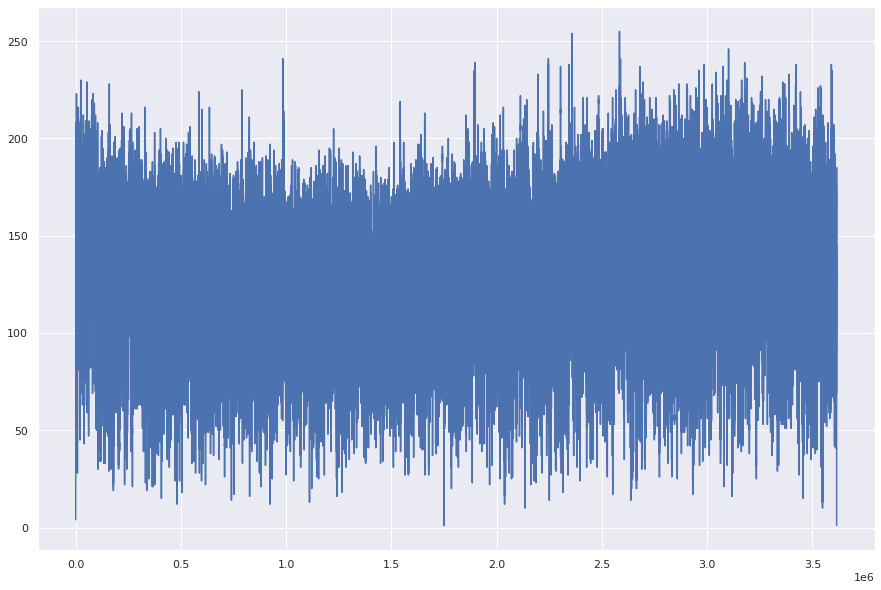

In [ ]:
coverage('fr_alignment_sorted.bam')

Среднее покрытие = 138.587
Доля покрытого генома = 0.887


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


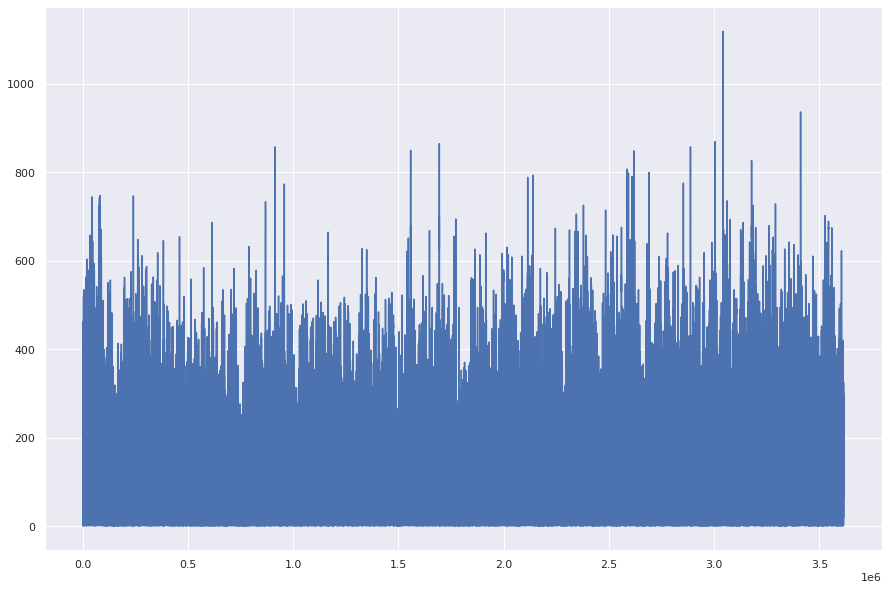

In [ ]:
coverage('jump_alignment_sorted.bam')

Итоговая табличка с результатами


In [ ]:
data = {'Среднее покрытие':[130.82,
                             138.587],
        
        'Доля покрытой области генома':['100%',
                              '88.7%']}

df = pd.DataFrame(data, index =['frag_alignment.sam',
                                'jump_alignment.sam'])
df

,Среднее покрытие,Доля покрытой области генома
frag_alignment.sam,130.820,100%
jump_alignment.sam,138.587,88.7%


# 2. Распределение расстояния вставки

In [ ]:
!samtools view -f 67 -F 0x800 fr_alignment_sorted.bam | awk '{print $9}' > fr_stat.txt

In [21]:
def inserts(file):
  insert = []
  with open(file, 'r') as file:
    for line in file:
        number = line.strip()
        num = int(number)
        insert.append(abs(num))
  insert = np.array(insert)
  q1 = np.percentile(insert, 2.5)
  q2 = np.percentile(insert, 97.5)
  df = pd.DataFrame()
  df['ins'] = insert
  df['count'] = 1
  df = df.groupby('ins').count()
  print(f'Среднее расстояние вставки =  {round(insert.mean(), 2)}')
  print(f'Среднеквадратичное отклонение = {round(insert.std(), 2)}')
  print(f'Интервал минимальной ширины, в который попадает 95% ридов: [{round(q1, 3)}, {round(q2, 3)}]') 
  sns.set(rc={'figure.figsize':(15, 10)})
  sns.lineplot(data=df, x=df.index, y=df['count'])
  

Среднее расстояние вставки =  266.21
Среднеквадратичное отклонение = 61.04
Интервал минимальной ширины, в который попадает 95% ридов: [173.0, 410.0]


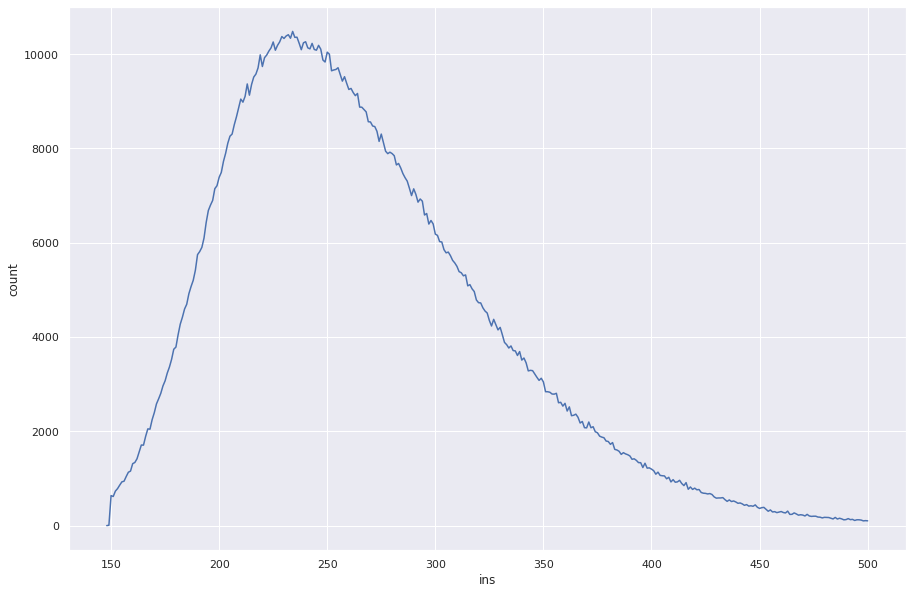

In [ ]:
inserts('fr_stat.txt')

In [90]:
!samtools stats jump_alignment_sorted.bam | grep ^IS | cut -f 2- > stats.txt

In [91]:
insert = pd.read_table('stats.txt', sep='\t', names=['IS', 'counts', '1', '2', '3'])
mas = []
num = insert['IS'] 
tot = insert['counts']
for t in range(len(tot)):
  for k in range(tot[t]):
    mas.append(num[t])
mas = np.array(mas)
q1 = np.percentile(mas, 2.5)
q2 = np.percentile(mas, 97.5)
print(f'Среднее расстояние вставки =  {round(mas.mean(), 2)}')
print(f'Среднеквадратичное отклонение = {round(mas.std(), 2)}')
print(f'Интервал минимальной ширины, в который попадает 95% ридов: [{round(q1, 3)}, {round(q2, 3)}]')

Среднее расстояние вставки =  7086.88
Среднеквадратичное отклонение = 1554.0
Интервал минимальной ширины, в который попадает 95% ридов: [0.0, 7999.0]


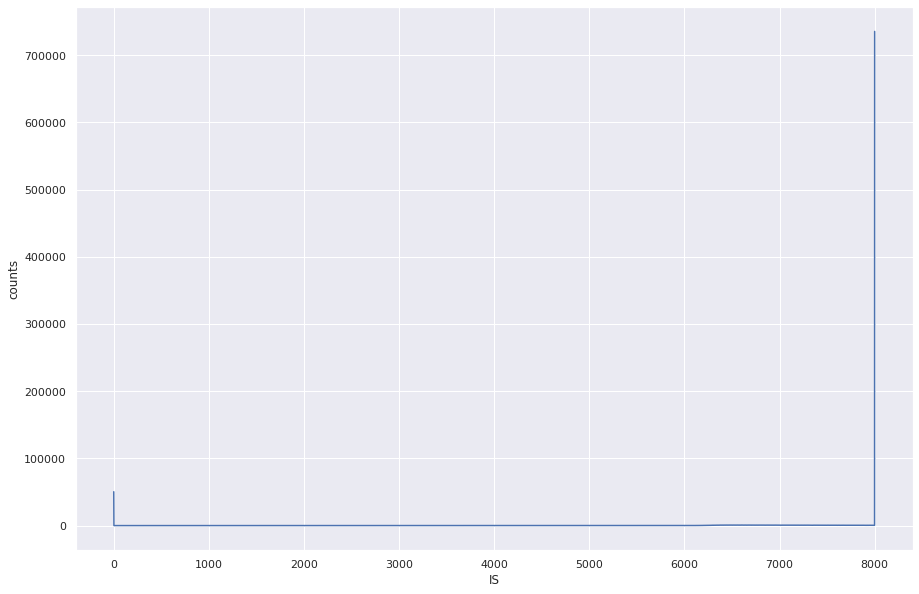

In [92]:
sns.lineplot(data=insert, x='IS', y='counts')

Подрежем экстремальные значения.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


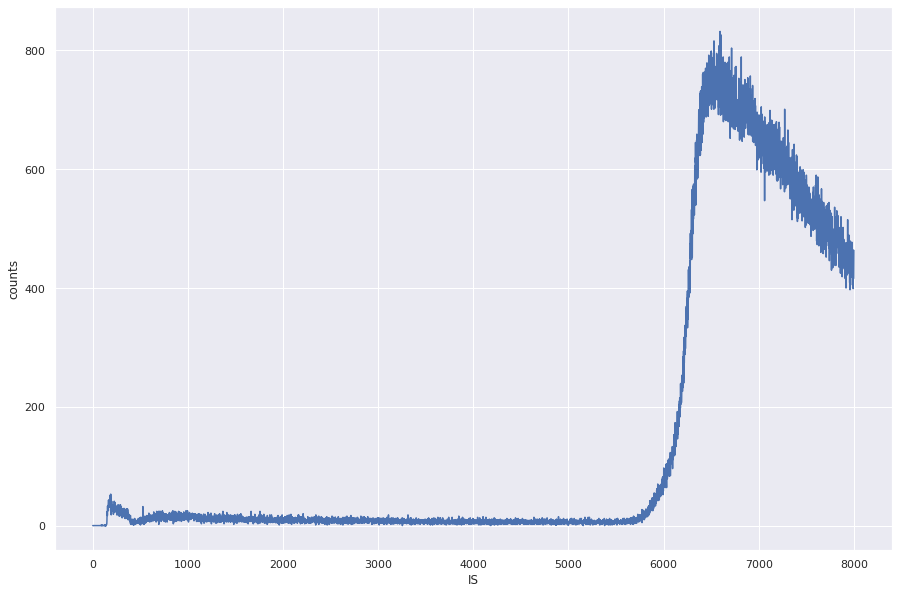

In [94]:
num_mod = num[1:-1]
tot_mod = tot[1:-1]
sns.lineplot(num_mod, y=tot_mod)

In [ ]:
data = {'Среднее расстояние вставки':[266.21,
                             274.77],
        
        'Среднеквадратичное отклонение':[61.04,
                             86.45],
        
        'Интервал минимальной ширины, в который попадает 95% ридов':['[173.0, 410.0]',
                              '[157.0, 478.0]']}

df = pd.DataFrame(data, index =['frag_alignment.sam',
                                'jump_alignment.bam'])
df

,Среднее расстояние вставки,Среднеквадратичное отклонение,"Интервал минимальной ширины, в который попадает 95% ридов"
frag_alignment.sam,266.21,61.04,"[173.0, 410.0]"
jump_alignment.bam,274.77,86.45,"[157.0, 478.0]"


# 3. Частоты различных замен

In [ ]:
!gunzip ref.fasta.gz

In [ ]:
from Bio import SeqIO
for ref in SeqIO.parse('ref.fasta', 'fasta'):
    genome = ref.seq

In [ ]:
keys = ['A', 'C', 'G', 'T', '-']
pairs = {key: {key: 0 for key in keys} for key in keys}
samfile = pysam.AlignmentFile('fr_alignment.sam', "r")
for read in samfile:
    al = read.get_aligned_pairs()
    read = read.query_sequence 
    for pair in al:
        ind_read = pair[0]
        ind_ref = pair[1]
        if ind_read != None and ind_ref != None and read[ind_read]!='N' and genome[ind_ref]!='N':
            pairs[read[ind_read]][genome[ind_ref]] += 1
        elif ind_read is None and ind_ref is not None and genome[ind_ref] != 'N':
            pairs['-'][genome[ind_ref]] += 1
        elif ind_read is not None and ind_ref is None and read[ind_read] != 'N':
            pairs[read[ind_read]]['-'] += 1

In [ ]:
df = pd.DataFrame({'A':pairs['A'], 'T':pairs['T'], 'G':pairs['G'], 'C':pairs['C'], '-':pairs['-']})
s = 0
for i in pairs.keys():
    s += sum(pairs[i].values())
    s -= pairs[i][i]
l = 0
samfile = pysam.AlignmentFile('fr_alignment.sam', "r")
for read in samfile.fetch():
    read = read.query_sequence
    l += len(read)
print(f'Процент ошибок = {round(s / l * 100, 2)}')
for i in range(5):
    df.iloc[i,i] = 0
df

Процент ошибок = 3.26


,A,T,G,C,-
A,0,231225,1477185,2298352,42494
C,1132733,0,2229790,164590465,50352
G,527321,1136912,0,2222600,51917
T,234948,63483445,2314922,0,43580
-,113860,117617,272090,273430,0


In [ ]:
keys = ['A', 'C', 'G', 'T', '-']
pairs = {key: {key: 0 for key in keys} for key in keys}
samfile = pysam.AlignmentFile('jump_alignment.sam', "r")
for read in samfile:
    al = read.get_aligned_pairs()
    read = read.query_sequence 
    for pair in al:
        ind_read = pair[0]
        ind_ref = pair[1]
        if ind_read != None and ind_ref != None and read[ind_read]!='N' and genome[ind_ref]!='N':
            pairs[read[ind_read]][genome[ind_ref]] += 1
        elif ind_read is None and ind_ref is not None and genome[ind_ref] != 'N':
            pairs['-'][genome[ind_ref]] += 1
        elif ind_read is not None and ind_ref is None and read[ind_read] != 'N':
            pairs[read[ind_read]]['-'] += 1

In [ ]:
df = pd.DataFrame({'A':pairs['A'], 'T':pairs['T'], 'G':pairs['G'], 'C':pairs['C'], '-':pairs['-']})
s = 0
for i in pairs.keys():
    s += sum(pairs[i].values())
    s -= pairs[i][i]
l = 0
samfile = pysam.AlignmentFile('jump_alignment.sam', "r")
for read in samfile.fetch():
    read = read.query_sequence
    l += len(read)
print(f'Процент ошибок = {round(s / l * 100, 2)}')
for i in range(5):
    df.iloc[i,i] = 0
df

Процент ошибок = 1.55


,A,T,G,C,-
A,0,81971,823224,1233853,19053
C,227204,0,872249,152987036,16586
G,127226,228243,0,860601,17068
T,81850,65375076,1250129,0,19503
-,65926,66368,207259,204971,0


In [ ]:
data = {'Процент ошибок':[3.26,
                             1.55]}

df = pd.DataFrame(data, index =['frag_alignment',
                                'jump_alignment'])
df

,Процент ошибок
frag_alignment,3.26
jump_alignment,1.55


#Часть 2: анализ ридов IonTorrent
##  Статистика ридов IonTorrent


***Реальные данные***

In [ ]:
download_from_disk('1Tu1EyQP45Wu-ibgUnf7Pw73UGpqQcyDp')

Downloading...
From: https://drive.google.com/uc?id=1Tu1EyQP45Wu-ibgUnf7Pw73UGpqQcyDp&confirm=t
To: /content/B22-730.fastq.gz
100%|██████████| 97.4M/97.4M [00:01<00:00, 94.7MB/s]


In [ ]:
download_from_disk('194itwrkAOCd73oyYrO2E7spO_LyOtWz1')

Downloading...
From: https://drive.google.com/uc?id=194itwrkAOCd73oyYrO2E7spO_LyOtWz1&confirm=t
To: /content/C24-698.fastq.gz
100%|██████████| 97.4M/97.4M [00:00<00:00, 100MB/s]


***Референсный геном***

In [ ]:
download_from_disk('1FKWaB4kcMtZWitippiOd_hRejwnyPYWD')

Downloading...
From: https://drive.google.com/uc?id=1FKWaB4kcMtZWitippiOd_hRejwnyPYWD&confirm=t
To: /content/DH10B-K12.fasta
100%|██████████| 4.75M/4.75M [00:00<00:00, 167MB/s]


In [ ]:
!bwa index DH10B-K12.fasta

[bwa_index] Pack FASTA... 0.05 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 1.36 seconds elapse.
[bwa_index] Update BWT... 0.03 sec
[bwa_index] Pack forward-only FASTA... 0.03 sec
[bwa_index] Construct SA from BWT and Occ... 0.60 sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa index DH10B-K12.fasta
[main] Real time: 2.174 sec; CPU: 2.078 sec


In [ ]:
!bwa mem DH10B-K12.fasta B22-730.fastq.gz > tor_b_alignment.sam

[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 30580 sequences (10000589 bp)...
[M::process] read 30700 sequences (10000499 bp)...
[M::mem_process_seqs] Processed 30580 reads in 6.169 CPU sec, 6.028 real sec
[M::process] read 30654 sequences (10000464 bp)...
[M::mem_process_seqs] Processed 30700 reads in 6.701 CPU sec, 6.519 real sec
[M::process] read 30558 sequences (10000069 bp)...
[M::mem_process_seqs] Processed 30654 reads in 7.316 CPU sec, 7.109 real sec
[M::process] read 30468 sequences (10000148 bp)...
[M::mem_process_seqs] Processed 30558 reads in 5.719 CPU sec, 5.444 real sec
[M::process] read 30596 sequences (10000413 bp)...
[M::mem_process_seqs] Processed 30468 reads in 5.855 CPU sec, 5.580 real sec
[M::process] read 30514 sequences (10000381 bp)...
[M::mem_process_seqs] Processed 30596 reads in 6.183 CPU sec, 5.906 real sec
[M::process] read 30520 sequences (10000266 bp)...
[M::mem_process_seqs] Processed 30514 reads in 5.663 CPU sec, 5.325 real sec
[M::pr

In [ ]:
!samtools sort tor_b_alignment.sam > tor_b_sorted.bam

In [ ]:
!samtools index tor_b_sorted.bam

In [ ]:
!bwa mem DH10B-K12.fasta C24-698.fastq.gz > tor_c_alignment.sam

[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 40748 sequences (10000257 bp)...
[M::process] read 40830 sequences (10000256 bp)...
[M::mem_process_seqs] Processed 40748 reads in 4.312 CPU sec, 4.169 real sec
[M::process] read 40678 sequences (10000475 bp)...
[M::mem_process_seqs] Processed 40830 reads in 4.431 CPU sec, 4.180 real sec
[M::process] read 40934 sequences (10000123 bp)...
[M::mem_process_seqs] Processed 40678 reads in 5.188 CPU sec, 4.933 real sec
[M::process] read 40668 sequences (10000353 bp)...
[M::mem_process_seqs] Processed 40934 reads in 4.039 CPU sec, 3.787 real sec
[M::process] read 40714 sequences (10000220 bp)...
[M::mem_process_seqs] Processed 40668 reads in 3.910 CPU sec, 3.650 real sec
[M::process] read 40714 sequences (10000207 bp)...
[M::mem_process_seqs] Processed 40714 reads in 4.336 CPU sec, 4.092 real sec
[M::process] read 40584 sequences (10000468 bp)...
[M::mem_process_seqs] Processed 40714 reads in 4.016 CPU sec, 3.777 real sec
[M::pr

In [ ]:
!samtools sort tor_c_alignment.sam > tor_c_sorted.bam

In [ ]:
!samtools index tor_c_sorted.bam

## B22-730.fastq

In [ ]:
reference = SeqIO.read('DH10B-K12.fasta', 'fasta').seq

Среднее покрытие = 34.037
Доля покрытого генома = 1.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


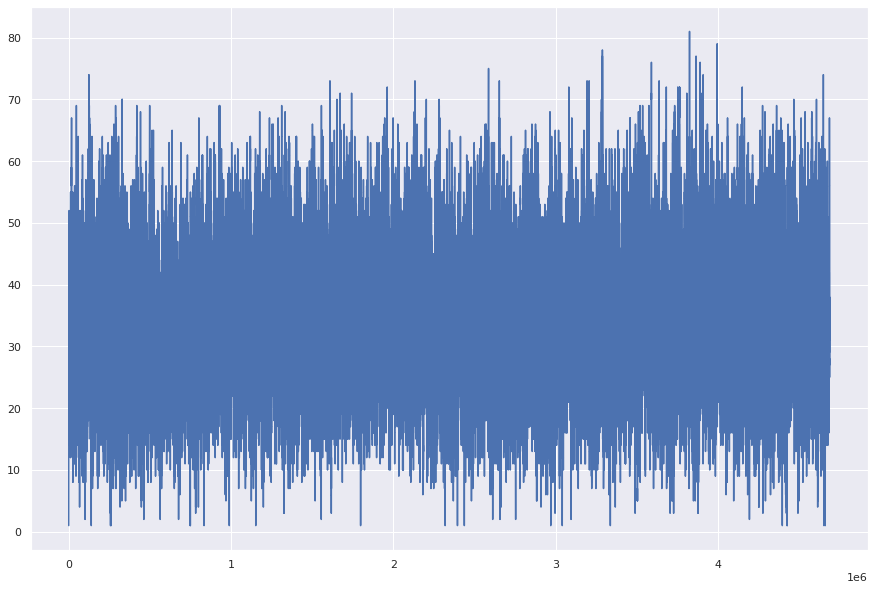

In [ ]:
coverage('tor_b_sorted.bam')

In [ ]:
!samtools stats tor_b_sorted.bam | grep ID > tor_b_stats.txt

In [ ]:
def indel(file):
  with open(file, 'r') as f:
    l = [line.strip() for line in f]
    IS = [0] * (len(l) - 1)
    COUNT = [0] * (len(l) - 1)
    sum_DEL = 0
    count_DEL = 0
    sum_INS = 0
    count_INS = 0
    for i in range(1, len(l)):
      a = l[i].split('\t')
      IS[i - 1] = int(a[1])
      sum_DEL += int(a[1]) * int(a[2])
      sum_INS += int(a[1]) * int(a[3])
      count_DEL += int(a[2])
      count_INS += int(a[3])
      COUNT[i - 1] = int(a[2]) + int(a[3])
  mean_DEL = sum_DEL / count_DEL
  mean_INS = sum_INS / count_INS
  print(f'Средняя длина делеции = {round(mean_DEL, 3)}', f'Средняя длина вставки = {round(mean_INS, 3)}')
  df = pd.DataFrame()
  df['indel size'] = IS
  df['count'] = COUNT
  sns.set(rc={'figure.figsize':(15, 10)})
  sns.lineplot(data=df, x=df['indel size'], y=df['count'])

Средняя длина делеции = 1.09 Средняя длина вставки = 1.064


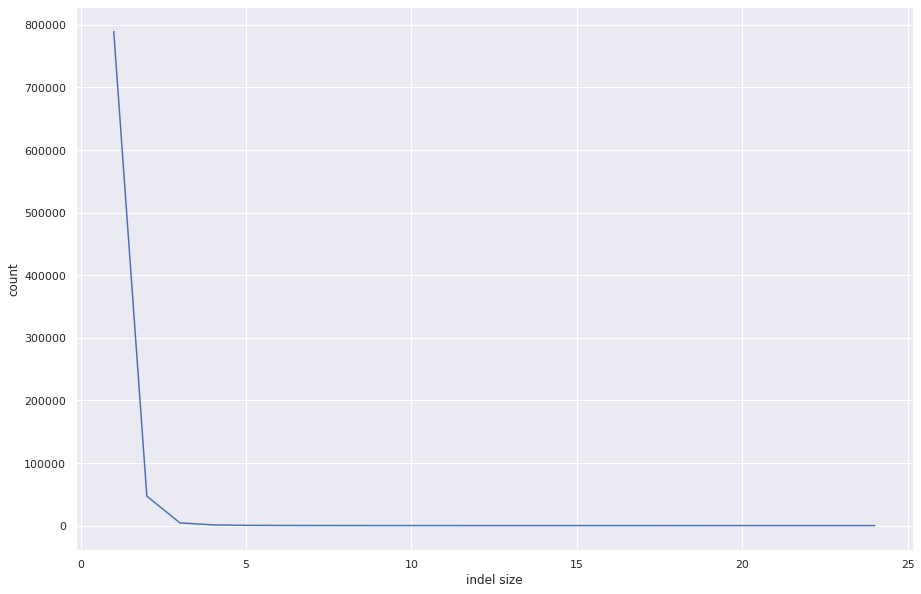

In [ ]:
indel('tor_b_stats.txt')

In [ ]:
from Bio import SeqIO
for ref in SeqIO.parse('DH10B-K12.fasta', 'fasta'):
    genome = ref.seq

In [ ]:
keys = ['A', 'C', 'G', 'T', '-']
pairs = {key: {key: 0 for key in keys} for key in keys}
samfile = pysam.AlignmentFile('tor_b_alignment.sam', "r")
for read in samfile:
    al = read.get_aligned_pairs()
    read = read.query_sequence 
    for pair in al:
        ind_read = pair[0]
        ind_ref = pair[1]
        if ind_read != None and ind_ref != None and read[ind_read]!='N' and genome[ind_ref]!='N':
            pairs[read[ind_read]][genome[ind_ref]] += 1
        elif ind_read is None and ind_ref is not None and genome[ind_ref] != 'N':
            pairs['-'][genome[ind_ref]] += 1
        elif ind_read is not None and ind_ref is None and read[ind_read] != 'N':
            pairs[read[ind_read]]['-'] += 1

In [ ]:
df = pd.DataFrame({'A':pairs['A'], 'T':pairs['T'], 'G':pairs['G'], 'C':pairs['C'], '-':pairs['-']})
s = 0
for i in pairs.keys():
    s += sum(pairs[i].values())
    s -= pairs[i][i]
l = 0
samfile = pysam.AlignmentFile('tor_b_alignment.sam', "r")
for read in samfile.fetch():
    read = read.query_sequence
    l += len(read)
print(f'Процент ошибок = {round(s / l * 100, 2)}')
for i in range(5):
    df.iloc[i,i] = 0
df

Процент ошибок = 1.61


,A,T,G,C,-
A,0,11173,23657,9147,119254
C,10360,0,8092,39493809,72479
G,17215,10563,0,7209,72804
T,11325,40010171,9060,0,119372
-,590244,591824,440955,442044,0


In [ ]:
def qual(alignment):
    letters = ['a', 'c', 'g', 't']
    bam = pysam.AlignmentFile(alignment, 'rb')
    ins_qual = []
    mismatch_qual = []
    for line in bam.fetch(bam.get_reference_name(0)):
        ci, c = 0, 0
        cigar = line.cigartuples
        read_len = line.query_length
        pairs = line.get_aligned_pairs(with_seq=True)
        qual = line.query_alignment_qualities
        for s in cigar:
            if s[0] == 0: 
                for ip, p in enumerate(pairs[ci:ci + s[1]]):
                    if p[2] in letters:
                        mismatch_qual.append(round(qual[c + ip], 2))
            elif s[0] == 1:
                for ip, p in enumerate(pairs[ci:ci + s[1]]):
                    if p[0] is not None:
                        ins_qual.append(round(qual[c + ip], 2))
            ci += s[1]
            if s[0] != 2 and s[0] != 4 and s[0] != 5:
                c += s[1]
    df_i = pd.DataFrame()
    df_i['Длина'] = ins_qual
    df_i['Количество'] = 1
    df_i = df_i.groupby('Длина').count()
    ins_qual = np.array(ins_qual)   
    print(f'Среднее качество нуклеотида при ошибочно вставленном нуклеотиде: {round(ins_qual.mean(), 2)}')
    print(f'Среднеквадратичное отклонение = {round(ins_qual.std(), 2)}')
    sns.set(rc={'figure.figsize':(15, 10)})
    sns.lineplot(data=df_i, x=df_i.index, y=df_i['Количество'])

    df_m = pd.DataFrame()
    df_m['mis'] = mismatch_qual
    df_m['Количество'] = 1
    df_m = df_m.groupby('mis').count()
    mismatch_qual = np.array(mismatch_qual)
    print(f'Среднее качество нуклеотида при замене: {round(np.mean(mismatch_qual), 2)}')
    print(f'Среднеквадратичное отклонение = {round(mismatch_qual.std(), 2)}')
    sns.set(rc={'figure.figsize':(15, 10)})
    sns.lineplot(data=df_m, x=df_m.index, y=df_m['Количество'])
    plt.legend(labels=["Ошибочно вставленный нуклеотид","Замена"], title = "Среднее качество нуклеотида")

Среднее качество нуклеотида при ошибочно вставленном нуклеотиде: 16.09
Среднеквадратичное отклонение = 5.88
Среднее качество нуклеотида при замене: 19.14
Среднеквадратичное отклонение = 8.04


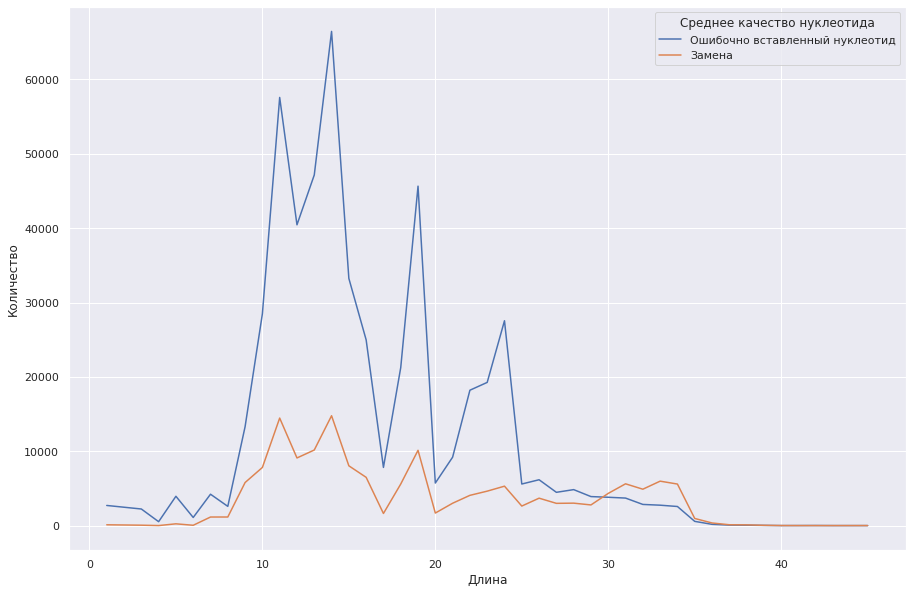

In [ ]:
qual('tor_b_sorted.bam')

In [ ]:
def homopolymer(file):
  indels_sum = 0
  homo_indels_sum = 0
  for position in file.pileup():
    position_values = position.get_query_sequences(add_indels=True)
    pileups = position.pileups
    for read in pileups:
      if read.indel:
        indels_sum += 1
        alignment = read.alignment
        end = alignment.query_alignment_sequence[read.query_position_or_next - 2 : read.query_position_or_next]
        start = alignment.query_alignment_sequence[read.query_position_or_next: read.query_position_or_next + 2]
        if start in ['AA', 'CC', 'TT', 'GG'] or end in ['AA', 'CC', 'TT', 'GG']:
          homo_indels_sum += 1
  print(f'Процент инделов, находящихся рядом с гомополимерными участками = {round(homo_indels_sum / indels_sum * 100, 2)}')

In [ ]:
sam_b = pysam.AlignmentFile('tor_b_sorted.bam', "rb")
homopolymer(sam_b)

Процент инделов, находящихся рядом с гомополимерными участками = 28.19


## C24-698.fastq

In [ ]:
reference = SeqIO.read('DH10B-K12.fasta', 'fasta').seq

Среднее покрытие = 35.704
Доля покрытого генома = 1.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


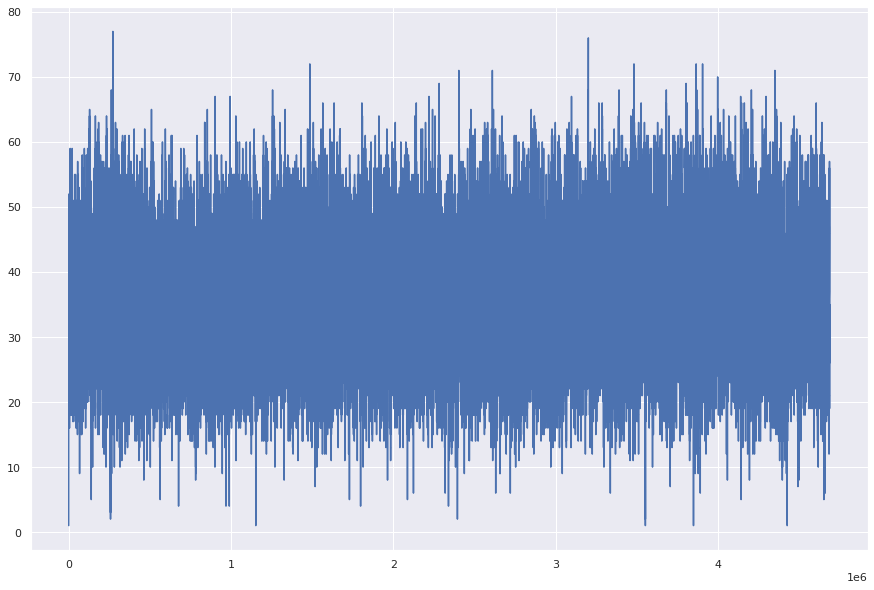

In [ ]:
coverage('tor_c_sorted.bam')

In [ ]:
!samtools stats tor_c_sorted.bam | grep ID > tor_c_stats.txt

Средняя длина делеции = 1.08 Средняя длина вставки = 1.055


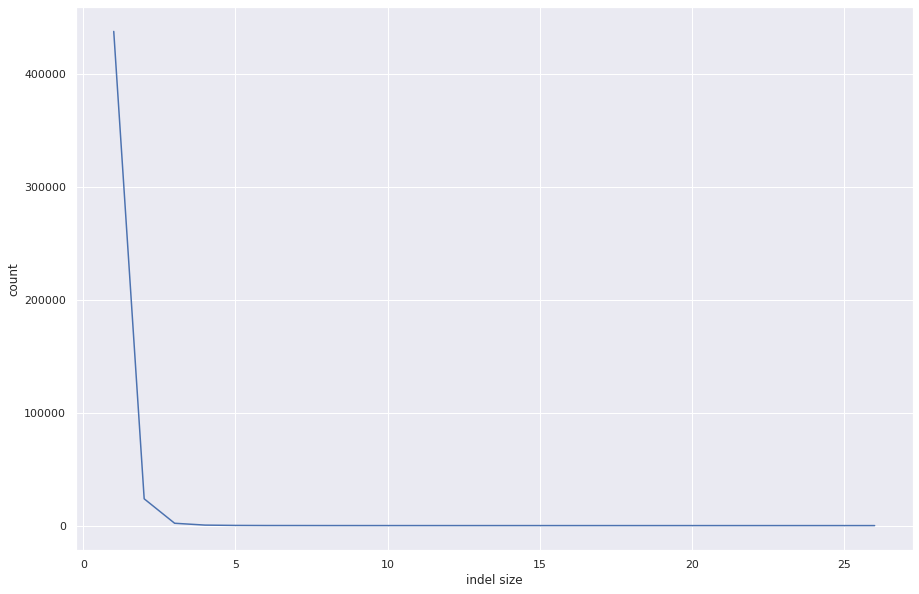

In [ ]:
indel('tor_c_stats.txt')

In [ ]:
from Bio import SeqIO
for ref in SeqIO.parse('DH10B-K12.fasta', 'fasta'):
    genome = ref.seq

In [ ]:
keys = ['A', 'C', 'G', 'T', '-']
pairs = {key: {key: 0 for key in keys} for key in keys}
samfile = pysam.AlignmentFile('tor_c_alignment.sam', "r")
for read in samfile:
    al = read.get_aligned_pairs()
    read = read.query_sequence 
    for pair in al:
        ind_read = pair[0]
        ind_ref = pair[1]
        if ind_read != None and ind_ref != None and read[ind_read]!='N' and genome[ind_ref]!='N':
            pairs[read[ind_read]][genome[ind_ref]] += 1
        elif ind_read is None and ind_ref is not None and genome[ind_ref] != 'N':
            pairs['-'][genome[ind_ref]] += 1
        elif ind_read is not None and ind_ref is None and read[ind_read] != 'N':
            pairs[read[ind_read]]['-'] += 1

In [ ]:
df = pd.DataFrame({'A':pairs['A'], 'T':pairs['T'], 'G':pairs['G'], 'C':pairs['C'], '-':pairs['-']})
s = 0
for i in pairs.keys():
    s += sum(pairs[i].values())
    s -= pairs[i][i]
l = 0
samfile = pysam.AlignmentFile('tor_c_alignment.sam', "r")
for read in samfile.fetch():
    read = read.query_sequence
    l += len(read)
print(f'Процент ошибок = {round(s / l * 100, 2)}')
for i in range(5):
    df.iloc[i,i] = 0
df

Процент ошибок = 0.69


,A,T,G,C,-
A,0,6488,21938,5124,37199
C,6751,0,5380,41826438,82132
G,14257,7069,0,4978,82142
T,6549,41693194,5248,0,37728
-,220153,220640,179672,180769,0


Среднее качество нуклеотида при ошибочно вставленном нуклеотиде: 15.39
Среднеквадратичное отклонение = 5.06
Среднее качество нуклеотида при замене: 21.04
Среднеквадратичное отклонение = 8.56


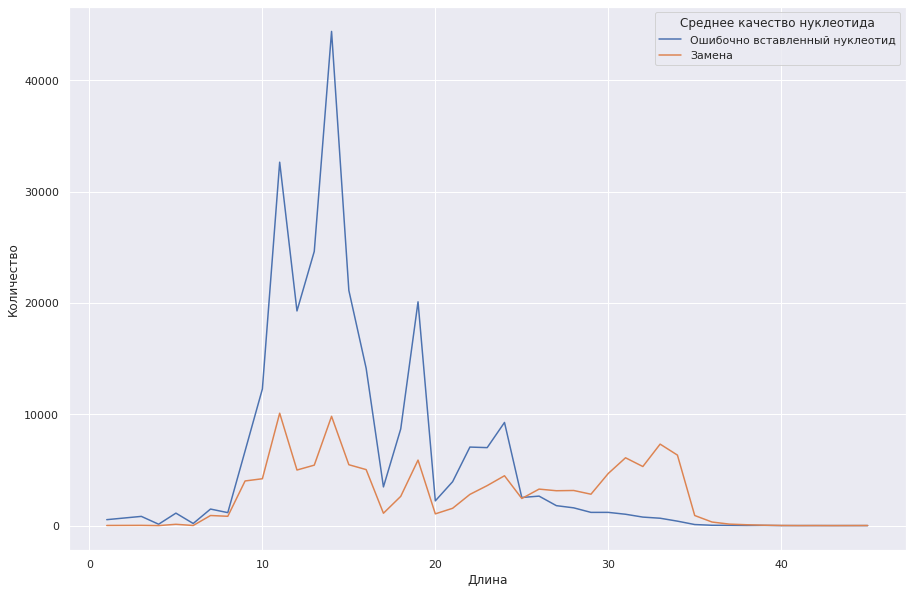

In [ ]:
qual('tor_c_sorted.bam')

In [ ]:
sam_c = pysam.AlignmentFile('tor_c_sorted.bam', "rb")
homopolymer(sam_c)

Процент инделов, находящихся рядом с гомополимерными участками = 26.26


In [ ]:
data = {'Среднее покрытие':[34.037,
                             35.7],
        
        'Доля покрытой области генома':['100%',
                              '100%'],
        
        'Процент ошибок':['1.61%',
                              '0.69%'],
        
        'Средняя длина делеции':[1.09,
                             1.08],
        
        'Средняя длина вставки':[1.064,
                             1.055],
        
        'Среднее качество при ошибочно вставленном нуклеотиде':[16.09,
                             15.39],
        
        'Среднее качество при замене':[19.14,
                             21.04],
        
        'Процент инделов, находящихся рядом с гомополимерными участками':[28.19,
                             26.26]}

df = pd.DataFrame(data, index =['B22-730',
                                'C24-698'])
df

,Среднее покрытие,Доля покрытой области генома,Процент ошибок,Средняя длина делеции,Средняя длина вставки,Среднее качество при ошибочно вставленном нуклеотиде,Среднее качество при замене,"Процент инделов, находящихся рядом с гомополимерными участками"
B22-730,34.037,100%,1.61%,1.09,1.064,16.09,19.14,28.19
C24-698,35.700,100%,0.69%,1.08,1.055,15.39,21.04,26.26


## Вывод

У ридов IonTorrent ниже процент ошибок при меньшем среднем покрытии.